In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Part 2 ~ Cricket data 
Linear regression & gradienct descent

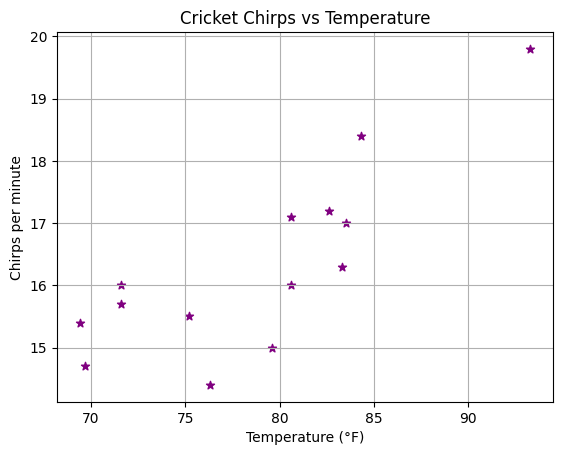

array([[71.6],
       [93.3],
       [84.3],
       [80.6],
       [75.2],
       [69.7],
       [71.6],
       [69.4],
       [83.3],
       [79.6],
       [82.6],
       [80.6],
       [83.5],
       [76.3]])

In [104]:
data_local_path =  'data\\Cricket.npz'

data = np.load(data_local_path)

yx = data['arr_0']

y = yx[:, 0].reshape(-1, 1)  # chirps per minute - freq
x = yx[:, 1].reshape(-1, 1)  # temp
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y, color='purple', marker='*')
plt.xlabel('Temperature (°F)')
plt.ylabel('Chirps per minute')
plt.title('Cricket Chirps vs Temperature')
plt.grid()
plt.show()

x

In [105]:
h = lambda theta, X: np.dot(X, theta)
cost_computation = lambda theta, X, y: (1 / (2 * y.size)) * np.sum((h(theta, X) - y) ** 2)

def batch_gd(theta, X, y, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        predictions = h(theta, X)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= alpha * gradient
        cost_history[i] = cost_computation(theta, X, y)
        
        if i % 100 == 0:  # print the cost every 100 iterations
            print(f"Iteration {i}: Cost {cost_history[i]}\n\nTheta: {theta}")
    
    return theta, cost_history

Iteration 0: Cost 131.54643001597128

Theta: [[0.16321429]
 [0.01158594]]
Iteration 100: Cost 17.923041204291096

Theta: [[10.40699957]
 [ 0.73875164]]
Iteration 200: Cost 2.699816515042382

Theta: [[14.15655628]
 [ 1.00491781]]
Iteration 300: Cost 0.6602138208871512

Theta: [[15.5290153 ]
 [ 1.10234323]]
Iteration 400: Cost 0.38694851508481287

Theta: [[16.03137969]
 [ 1.13800409]]
Iteration 500: Cost 0.3503365182634549

Theta: [[16.2152613 ]
 [ 1.15105712]]
Iteration 600: Cost 0.3454312548334281

Theta: [[16.28256792]
 [ 1.15583495]]
Iteration 700: Cost 0.3447740492339803

Theta: [[16.30720431]
 [ 1.15758379]]
Iteration 800: Cost 0.34468599704145153

Theta: [[16.31622203]
 [ 1.15822392]]
Iteration 900: Cost 0.3446741998373262

Theta: [[16.31952281]
 [ 1.15845823]]
Iteration 1000: Cost 0.344672619251753

Theta: [[16.320731  ]
 [ 1.15854399]]
Iteration 1100: Cost 0.3446724074854118

Theta: [[16.32117324]
 [ 1.15857539]]
Iteration 1200: Cost 0.3446723791130264

Theta: [[16.32133511]
 [ 

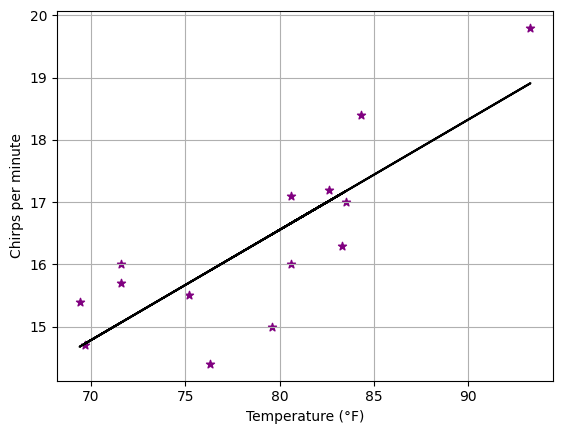

In [107]:
x_norm = (x - np.mean(x)) / np.std(x)


ones = np.ones(x.shape[0]) 
X = np.c_[ones, x_norm] 
y = y.reshape(-1, 1)  # target vector

theta = np.zeros((2, 1))
alpha = 0.01 
num_iters = 2000 

theta, cost = batch_gd(theta, X, y, alpha, num_iters)

plt.figure()
plt.scatter(x, y, color='purple', marker='*')
plt.plot(x, h(theta, X), color='black')
plt.grid()
plt.xlabel('Temperature (°F)')
plt.ylabel('Chirps per minute')
plt.show()


In [108]:
def make_prediton(termperature, theta):
    return theta[0] + theta[1] * termperature

print(f'Prediction for 58°F: {make_prediton(58, theta)[0]:.3f}')
print(f'Prediction for 38°F: {make_prediton(38, theta)[0]:.3f}')

Prediction for 58°F: 83.520
Prediction for 38°F: 60.348


Q : whats is the prediction of the crickets chirps at 58 degrees fahrenheit and 38 degrees fahrenheit ? 

A : Prediction for  58°F:  83.520,   Prediction for  38°F:  60.348